# **Project Title:** Rocket Propellant Analysis

## 1) Data Exploration

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('/content/propellants_imputed_simple_median.csv')
df.head()

,Propellant_ID,Propellant_Name,Propellant_Type,Chemical_Family,Country_Origin,Vacuum_Isp_sec,SL_Isp_sec,Characteristic_Velocity_m_s,Combustion_Temp_K,Exhaust_MW_g_mol,...,Hypergolic_Binary,Flash_Point_C,Autoignition_Temp_C,Environmental_Impact_Score_1_10,Restartable_Binary,Throttleable_Binary,TRL_1_9,Flight_Heritage_Count,Application_Primary,Notes
0,1,LOX+LH2,Liquid_Biprop,Cryogenic,USA,451,391,2435,2985,10.0,...,0,-253.0,560,1,1,1,9,5000,Upper_Stage,Highest performance cryogenic
1,2,LOX+RP-1,Liquid_Biprop,Hydrocarbon,USA,311,282,1780,3670,23.2,...,0,38.0,210,3,1,1,9,8000,First_Stage,SpaceX Falcon 9
2,3,LOX+RP-2,Liquid_Biprop,Hydrocarbon,USA,316,285,1795,3680,23.0,...,0,42.0,215,3,1,1,8,200,First_Stage,Refined kerosene variant
3,4,LOX+CH4,Liquid_Biprop,Cryogenic,USA,369,334,2180,3310,16.6,...,0,-188.0,537,2,1,1,9,500,First_Stage,SpaceX Starship Raptor
4,5,LOX+LNG,Liquid_Biprop,Cryogenic,USA,363,330,2150,3290,17.2,...,0,-182.0,540,2,1,1,9,100,First_Stage,Blue Origin BE-4


In [98]:
df.isnull().sum()

,0
Propellant_ID,0
Propellant_Name,0
Propellant_Type,0
Chemical_Family,0
Country_Origin,0
Vacuum_Isp_sec,0
SL_Isp_sec,0
Characteristic_Velocity_m_s,0
Combustion_Temp_K,0
Exhaust_MW_g_mol,0


In [99]:
df.shape

(70, 37)

In [100]:
data_Num = df.select_dtypes(include=np.number).columns.tolist()
data_Num

['Propellant_ID',
 'Vacuum_Isp_sec',
 'SL_Isp_sec',
 'Characteristic_Velocity_m_s',
 'Combustion_Temp_K',
 'Exhaust_MW_g_mol',
 'Optimal_MR_O_F',
 'Bulk_Density_g_cm3',
 'Density_Impulse_sec_g_cm3',
 'Oxidizer_Density_g_cm3',
 'Fuel_Density_g_cm3',
 'Oxidizer_BP_C',
 'Fuel_BP_C',
 'Oxidizer_FP_C',
 'Fuel_FP_C',
 'Vapor_Pressure_20C_kPa',
 'Cost_Score_1_10',
 'Storage_Temp_C',
 'Storability_Days',
 'Handling_Complexity_1_10',
 'Infrastructure_Score_1_10',
 'Toxicity_Score_0_10',
 'Corrosivity_Score_0_10',
 'Hypergolic_Binary',
 'Flash_Point_C',
 'Autoignition_Temp_C',
 'Environmental_Impact_Score_1_10',
 'Restartable_Binary',
 'Throttleable_Binary',
 'TRL_1_9',
 'Flight_Heritage_Count']

In [101]:
data_cat = df.select_dtypes(include='object').columns.tolist()
data_cat

['Propellant_Name',
 'Propellant_Type',
 'Chemical_Family',
 'Country_Origin',
 'Application_Primary',
 'Notes']

In [102]:
for col in data_cat:
    print(f"\nUnique values and counts for '{col}':")
    print(df[col].value_counts())
    print("----------------------------------------")


Unique values and counts for 'Propellant_Name':
Propellant_Name
LOX+LH2                1
LOX+RP-1               1
LOX+RP-2               1
LOX+CH4                1
LOX+LNG                1
                      ..
Aluminum_Slurry+LOX    1
Start-1_Solid          1
CZ-11_Solid            1
Vega_P80_Solid         1
ADN_FLP-106            1
Name: count, Length: 70, dtype: int64
----------------------------------------

Unique values and counts for 'Propellant_Type':
Propellant_Type
Liquid_Biprop       39
Solid_Propellant    15
Monopropellant       8
Hybrid               7
Tripropellant        1
Name: count, dtype: int64
----------------------------------------

Unique values and counts for 'Chemical_Family':
Chemical_Family
Hypergolic           10
Composite_Solid      10
Exotic                8
Cryogenic             7
Hybrid                7
Hydrocarbon           6
Metallized            4
Green_Monoprop        4
Peroxide              3
Monoprop              3
Nitramine_Solid       2
Alcoh

## 2) Exploratory Data Analysis (EDA)

In [103]:
# Drop irrelevant categorical features
remove_cols = ['Propellant_ID', 'Propellant_Name', 'Notes', 'Country_Origin']

df_eda = df.drop(columns=remove_cols, errors='ignore')

# Separate numerical and categorical
num_cols = df_eda.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_eda.select_dtypes(include=['object']).columns.tolist()

print(f"\nRemaining features: {df_eda.shape[1]}")
print(f"Numerical: {len(num_cols)}, Categorical: {len(cat_cols)}")


Remaining features: 33
Numerical: 30, Categorical: 3


In [104]:
num_cols = df_eda.select_dtypes(include=np.number)
num_cols.head()

,Vacuum_Isp_sec,SL_Isp_sec,Characteristic_Velocity_m_s,Combustion_Temp_K,Exhaust_MW_g_mol,Optimal_MR_O_F,Bulk_Density_g_cm3,Density_Impulse_sec_g_cm3,Oxidizer_Density_g_cm3,Fuel_Density_g_cm3,...,Toxicity_Score_0_10,Corrosivity_Score_0_10,Hypergolic_Binary,Flash_Point_C,Autoignition_Temp_C,Environmental_Impact_Score_1_10,Restartable_Binary,Throttleable_Binary,TRL_1_9,Flight_Heritage_Count
0,451,391,2435,2985,10.0,5.50,0.36,162,1.14,0.071,...,2,3,0,-253.0,560,1,1,1,9,5000
1,311,282,1780,3670,23.2,2.56,1.03,320,1.14,0.820,...,2,2,0,38.0,210,3,1,1,9,8000
2,316,285,1795,3680,23.0,2.50,1.05,332,1.14,0.840,...,2,2,0,42.0,215,3,1,1,8,200
3,369,334,2180,3310,16.6,3.50,0.82,303,1.14,0.420,...,2,2,0,-188.0,537,2,1,1,9,500
4,363,330,2150,3290,17.2,3.40,0.84,305,1.14,0.450,...,2,2,0,-182.0,540,2,1,1,9,100


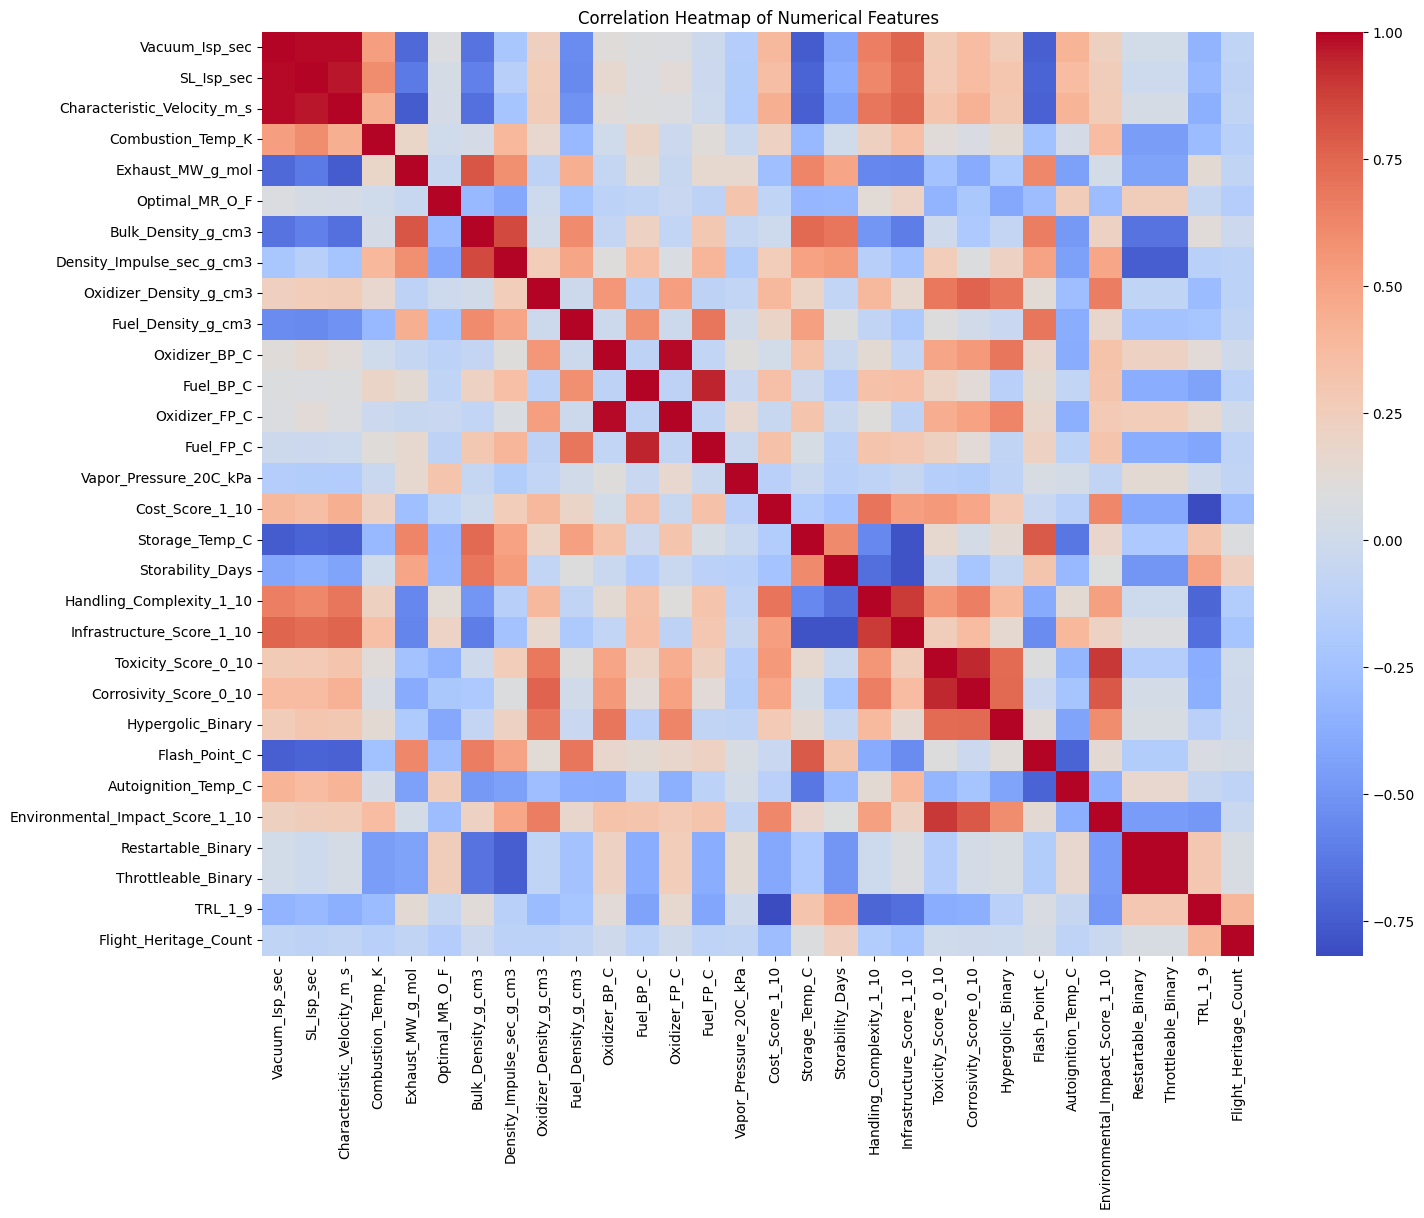

In [105]:
correlation_matrix = num_cols.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [106]:
# Statistical summary by propellant type
if 'Propellant_Type' in df_eda.columns:
    print("\nKey Statistics by Propellant Type:")
    summary = df_eda.groupby('Propellant_Type')[['Vacuum_Isp_sec', 'Cost_Score_1_10',
                                                     'Toxicity_Score_0_10', 'TRL_1_9']].agg(['mean', 'std', 'min', 'max'])
    display(summary)


Key Statistics by Propellant Type:


Vacuum_Isp_sec                      Cost_Score_1_10  \
                           mean        std  min  max            mean   
Propellant_Type                                                        
Hybrid               254.714286   8.400680  245  270        3.857143   
Liquid_Biprop        334.794872  49.846174  265  465        5.076923   
Monopropellant       233.250000  27.175356  180  266        5.500000   
Solid_Propellant     260.600000  17.241147  210  280        4.333333   
Tripropellant        542.000000        NaN  542  542       10.000000   

                                   Toxicity_Score_0_10                    \
                       std min max                mean       std min max   
Propellant_Type                                                            
Hybrid            0.690066   3   5            2.857143  1.069045   2   5   
Liquid_Biprop     2.599439   2  10            6.435897  3.283090   2  10   
Monopropellant    1.195229   4   7            5.375000  2.774244   3  10   
Solid_Propellant  1.676163   3   8            4.333333  0.816497   3   6   
Tripropellant          NaN  10  10           10.000000       NaN  10  10   

                   TRL_1_9                    
                      mean       std min max  
Propellant_Type                               
Hybrid            6.857143  0.377964   6   7  
Liquid_Biprop     6.641026  2.680212   2   9  
Monopropellant    7.250000  1.488048   5   9  
Solid_Propellant  8.400000  1.121224   5   9  
Tripropellant     2.000000       NaN   2   2

Feature Engineering

Weighted Averaging the Score Variables:

- Cost_Score_1_10
- Handling_Complexity_1_10
- Infrastructure_Score_1_10
- Toxicity_Score_0_10
- Corrosivity_Score_0_10
- Environmental_Impact_Score_1_10
- TRL_1_9

In [107]:
def create_composite_indices(df):
    """
    Create weighted composite scores to reduce bias from multiple 1-10 scales.
    """
    df_new = df.copy()

    # COMPOSITE 1: Operational Complexity
    # (How difficult is it to operate?)
    df_new['Operational_Complexity_Index'] = (
        0.5 * df['Handling_Complexity_1_10'] +      # Most important
        0.5 * df['Infrastructure_Score_1_10']       # Very important
    )



    # COMPOSITE 2: Safety & Environmental
    # (How dangerous is this propellant?)
    df_new['Safety_Environmental_Index'] = (
        0.40 * df['Toxicity_Score_0_10'] +           # Most critical
        0.35 * df['Corrosivity_Score_0_10'] +        # Very important
        0.25 * df['Environmental_Impact_Score_1_10'] # Important
    )

    # COMPOSITE 3: Technology Maturity
    # (How ready is this technology?)
    # TRL is 1-9, normalize to 0-10 scale for consistency
    df_new['Maturity_Index'] = (df['TRL_1_9'] - 1) / 8 * 10

    # COMPOSITE 4: Economic Factor
    # (How expensive is this fuel?)
    df_new['Economic_Factor_Index'] = df['Cost_Score_1_10']

    # Remove original score columns (no longer needed)
    score_columns = [
        'Cost_Score_1_10',
        'Handling_Complexity_1_10',
        'Infrastructure_Score_1_10',
        'Toxicity_Score_0_10',
        'Corrosivity_Score_0_10',
        'Environmental_Impact_Score_1_10',
        'TRL_1_9'
    ]

    df_new = df_new.drop(columns=score_columns)

    print(f"\nCreated {4} composite indices from {len(score_columns)} score variables")
    print(f"New dataset shape: {df_new.shape}")

    return df_new

# Apply the transformation
df_composite = create_composite_indices(df)


Created 4 composite indices from 7 score variables
New dataset shape: (70, 34)


In [108]:
# Define columns to exclude from PCA (non-numeric or identifiers)
exclude_from_pca = [
    'Propellant_ID',
    'Propellant_Name',
    'Propellant_Type',
    'Chemical_Family',
    'Country_Origin',
    'Hypergolic_Binary',
    'Restartable_Binary',
    'Throttleable_Binary',
    'Application_Primary',
    'Notes'
]

# Select numeric features for PCA
numeric_features = [col for col in df_composite.columns
                   if col not in exclude_from_pca]

print(f"\nNumeric features for PCA: {len(numeric_features)}")

# Create feature matrix
X = df_composite[numeric_features].copy()

print(f"Feature matrix shape: {X.shape}")


Numeric features for PCA: 24
Feature matrix shape: (70, 24)


## 3) Mean Centering the data

In [109]:
column_means = X.mean()
print("Mean of each column:")
print(column_means)
print('\n',list(round(column_means, 3)))

Mean of each column:
Vacuum_Isp_sec                   302.242857
SL_Isp_sec                       270.257143
Characteristic_Velocity_m_s     1797.785714
Combustion_Temp_K               3161.214286
Exhaust_MW_g_mol                  21.851429
Optimal_MR_O_F                     3.322857
Bulk_Density_g_cm3                 1.243571
Density_Impulse_sec_g_cm3        360.385714
Oxidizer_Density_g_cm3             1.286429
Fuel_Density_g_cm3                 0.880057
Oxidizer_BP_C                   -138.905714
Fuel_BP_C                        200.554286
Oxidizer_FP_C                   -173.348571
Fuel_FP_C                         -4.220000
Vapor_Pressure_20C_kPa           163.055714
Storage_Temp_C                   -35.128571
Storability_Days                 528.342857
Flash_Point_C                     -9.320000
Autoignition_Temp_C              304.314286
Flight_Heritage_Count            910.285714
Operational_Complexity_Index       5.964286
Safety_Environmental_Index         5.117143
Maturity_In

In [110]:
column_stddevi = X.std()
print("Mean of each column:")
print(column_stddevi)
print('\n',list(round(column_stddevi, 3)))

Mean of each column:
Vacuum_Isp_sec                    64.029530
SL_Isp_sec                        57.448575
Characteristic_Velocity_m_s      299.744620
Combustion_Temp_K                604.795112
Exhaust_MW_g_mol                   4.694608
Optimal_MR_O_F                     1.658361
Bulk_Density_g_cm3                 0.374514
Density_Impulse_sec_g_cm3         91.779397
Oxidizer_Density_g_cm3             0.168901
Fuel_Density_g_cm3                 0.359277
Oxidizer_BP_C                     81.456963
Fuel_BP_C                        561.501352
Oxidizer_FP_C                     84.004939
Fuel_FP_C                        282.228209
Vapor_Pressure_20C_kPa           870.895816
Storage_Temp_C                    72.308302
Storability_Days                 610.317876
Flash_Point_C                     85.608461
Autoignition_Temp_C              122.210266
Flight_Heritage_Count           1905.737631
Operational_Complexity_Index       2.048898
Safety_Environmental_Index         2.668345
Maturity_In

In [111]:
X_centered = X - X.mean()
X_scaled = (X_centered) / X.std(ddof=1)
print(X_centered)
print(X_scaled)

    Vacuum_Isp_sec  SL_Isp_sec  Characteristic_Velocity_m_s  \
0       148.757143  120.742857                   637.214286   
1         8.757143   11.742857                   -17.785714   
2        13.757143   14.742857                    -2.785714   
3        66.757143   63.742857                   382.214286   
4        60.757143   59.742857                   352.214286   
..             ...         ...                          ...   
65        7.757143    7.742857                    22.214286   
66      -42.242857  -32.257143                  -222.785714   
67      -38.242857  -28.257143                  -212.785714   
68      -22.242857  -14.257143                  -137.785714   
69      -54.242857  -63.257143                  -182.785714   

    Combustion_Temp_K  Exhaust_MW_g_mol  Optimal_MR_O_F  Bulk_Density_g_cm3  \
0         -176.214286        -11.851429        2.177143           -0.883571   
1          508.785714          1.348571       -0.762857           -0.213571   
2     

## 4) EigenValue Decomposition Algorithm

In [112]:
cov_matrix = np.cov(X_scaled.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Calculate r2 score
total_variance = np.sum(eigenvalues)
r2_pc1 = eigenvalues[0] / total_variance
r2_pc2 = eigenvalues[1] / total_variance
r2_total = r2_pc1 + r2_pc2

R2 = eigenvalues / total_variance
totalR2 = np.cumsum(R2)

print("R2 for PC1:", r2_pc1)
print("R2 for PC2:", r2_pc2)
print("Total R2 score of both components:", r2_total)

R2 for PC1: 0.3246514459347491
R2 for PC2: 0.18755872095998932
Total R2 score of both components: 0.5122101668947384


In [113]:
eigenvalues

array([7.79163470e+00, 4.50140930e+00, 3.19966296e+00, 2.07335070e+00,
       1.54375226e+00, 1.26463325e+00, 8.08358424e-01, 6.48549260e-01,
       6.23887724e-01, 4.28710842e-01, 3.01126425e-01, 2.47830259e-01,
       1.66943193e-01, 1.10705641e-01, 9.02837747e-02, 6.65519201e-02,
       3.67876441e-02, 3.22065893e-02, 2.98498912e-02, 1.58946335e-02,
       8.53014236e-03, 6.00706919e-03, 2.31553207e-03, 1.01785627e-03])

In [114]:
#Extra
r2_pc3 = eigenvalues[2] / total_variance
r2_pc4 = eigenvalues[3] / total_variance
r2_pc5 = eigenvalues[4] / total_variance

print("Manual R² for PC3:", r2_pc3)
print("Manual R² for PC4:", r2_pc4)
print("Manual R² for PC5:", r2_pc5)

r2_total = r2_pc1 + r2_pc2 + r2_pc3 + r2_pc4 + r2_pc5
print("Total R² using 5 PCs:", r2_total)

Manual R² for PC3: 0.1333192897988177
Manual R² for PC4: 0.08638961259995481
Manual R² for PC5: 0.06432301086269927
Total R² using 5 PCs: 0.7962420801562102


In [115]:
variables = X.columns
variance_explained = pd.DataFrame(
    (eigenvectors ** 2) * eigenvalues,
    index=variables,
    columns=[f'PC{i+1}' for i in range(len(eigenvalues))]
)

# Select only top 5 components
variance_explained_top5 = variance_explained.iloc[:, :5]

print("Variance Explained by Each PC for Each Variable (Top 5 PCs):")

#only used to make Stacked bar graph look more easy to interpret.
var_list = ['Vacuum_Isp_sec', 'SL_Isp_sec', 'Characteristic_Velocity_m_s', 'Combustion_Temp_K', 'Exhaust_MW_g_mol', 'Optimal_MR_O_F', 'Bulk_Density_g_cm3', 'Density_Impulse_sec_g_cm3', 'Oxidizer_Density_g_cm3', 'Fuel_Density_g_cm3', 'Oxidizer_BP_C', 'Fuel_BP_C', 'Oxidizer_FP_C', 'Fuel_FP_C', 'Storage_Temp_C', 'Storability_Days', 'Flash_Point_C', 'Autoignition_Temp_C', 'Flight_Heritage_Count', 'Operational_Complexity_Index', 'Safety_Environmental_Index', 'Maturity_Index', 'Economic_Factor_Index']
variance_explained_top5 = variance_explained_top5.loc[var_list]

# Display as formatted table
from IPython.display import display
display(variance_explained_top5)

Variance Explained by Each PC for Each Variable (Top 5 PCs):


,PC1,PC2,PC3,PC4,PC5
Vacuum_Isp_sec,0.845843,0.031033,0.011900,0.068284,0.000255
SL_Isp_sec,0.778479,0.041636,0.021991,0.106386,0.004838
Characteristic_Velocity_m_s,0.852699,0.040956,0.013720,0.049460,0.003901
Combustion_Temp_K,0.106446,0.112831,0.002281,0.347683,0.276597
Exhaust_MW_g_mol,0.632186,0.012922,0.026338,0.023292,0.210068
Optimal_MR_O_F,0.063122,0.088464,0.017566,0.162440,0.273825
Bulk_Density_g_cm3,0.697955,0.106752,0.022313,0.094317,0.018250
Density_Impulse_sec_g_cm3,0.247714,0.413601,0.002826,0.226456,0.032012
Oxidizer_Density_g_cm3,0.019291,0.301212,0.362929,0.003790,0.014724
Fuel_Density_g_cm3,0.349378,0.262296,0.140256,0.098361,0.039516


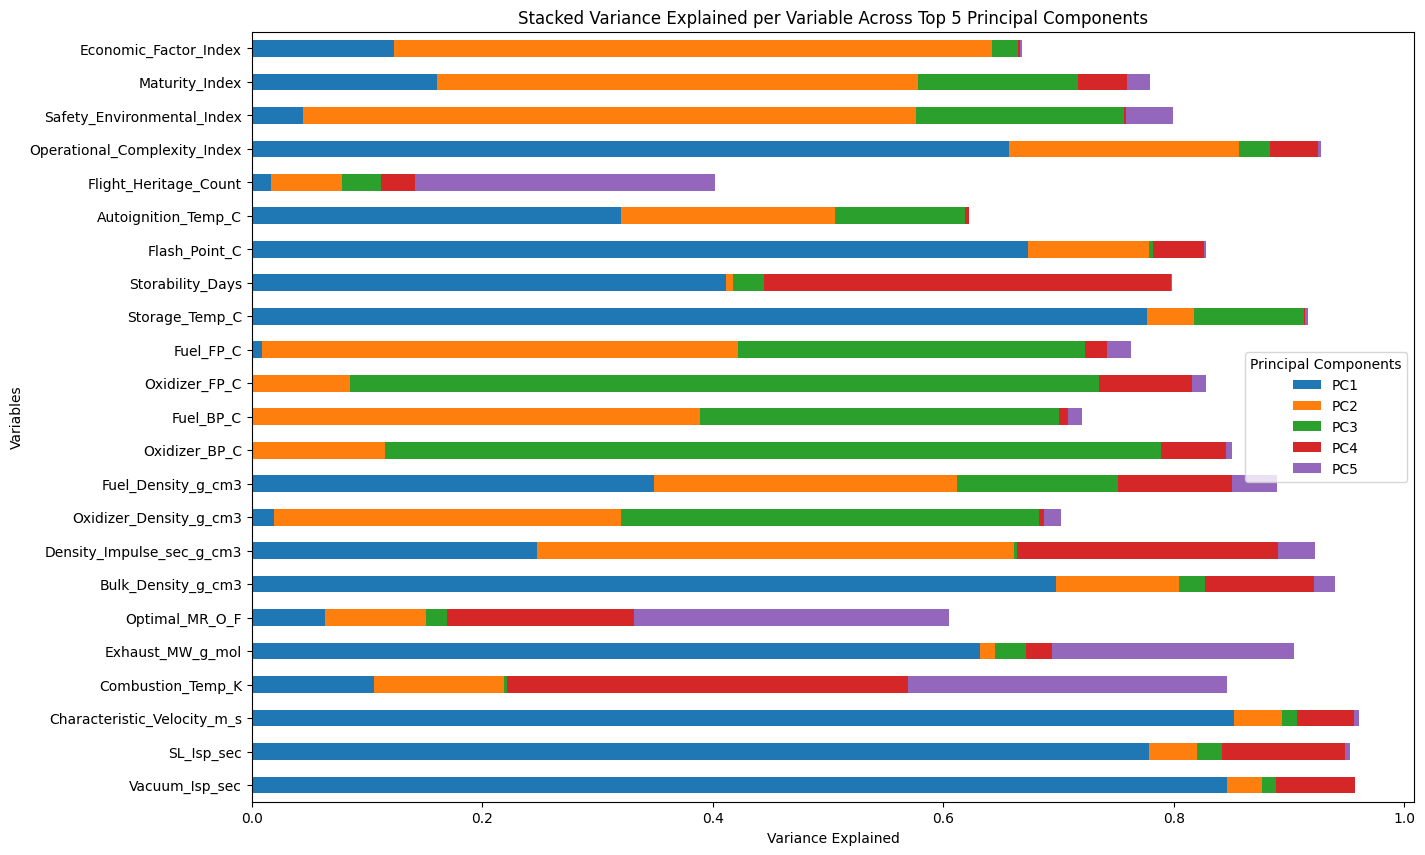

In [116]:
variance_explained_top5.plot(kind='barh', stacked=True)
plt.gcf().set_size_inches(15, 10)

plt.xlabel('Variance Explained')
plt.ylabel('Variables')
plt.title('Stacked Variance Explained per Variable Across Top 5 Principal Components')
plt.legend(title='Principal Components')
plt.show()

In [117]:
# Top feature loadings
print("\nTop 5 Feature Loadings for First 3 PCs:")
print("-"*80)
for i in range(5):
    loadings = eigenvectors[:, i]
    top_features_idx = np.argsort(np.abs(loadings))[-5:][::-1]
    print(f"\nPC{i+1}:")
    for idx in top_features_idx:
        if idx < len(X.columns):
            print(f"  {X.columns[idx]:<40} {loadings[idx]:>10.4f}")


Top 5 Feature Loadings for First 3 PCs:
--------------------------------------------------------------------------------

PC1:
  Characteristic_Velocity_m_s                  0.3308
  Vacuum_Isp_sec                               0.3295
  SL_Isp_sec                                   0.3161
  Storage_Temp_C                              -0.3158
  Bulk_Density_g_cm3                          -0.2993

PC2:
  Safety_Environmental_Index                  -0.3437
  Economic_Factor_Index                       -0.3396
  Maturity_Index                               0.3046
  Density_Impulse_sec_g_cm3                   -0.3031
  Fuel_FP_C                                   -0.3029

PC3:
  Oxidizer_BP_C                                0.4585
  Oxidizer_FP_C                                0.4507
  Oxidizer_Density_g_cm3                       0.3368
  Fuel_BP_C                                   -0.3117
  Fuel_FP_C                                   -0.3068

PC4:
  Storability_Days                          

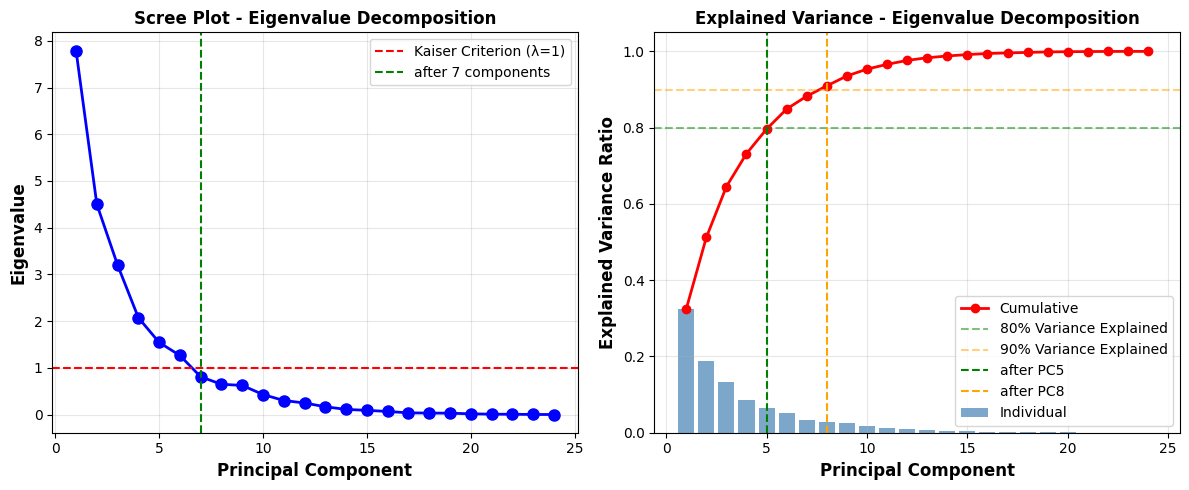

In [118]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Scree plot
ax = axes[0] # Corrected from axes[0, 1]
pc_range = range(1, min(31, len(eigenvalues) + 1))
ax.plot(pc_range, eigenvalues[:len(pc_range)], 'bo-', linewidth=2, markersize=8)
ax.set_xlabel('Principal Component', fontweight='bold', fontsize=12)
ax.set_ylabel('Eigenvalue', fontweight='bold', fontsize=12)
ax.set_title('Scree Plot - Eigenvalue Decomposition', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=1, color='r', linestyle='--', label='Kaiser Criterion (λ=1)')
ax.axvline(x=7, color='g', linestyle='dashed', label='after 7 components')
ax.legend()

# 2. Explained variance ratio
ax = axes[1] # Corrected from axes[0, 2]
ax.bar(pc_range, R2[:len(pc_range)], alpha=0.7, color='steelblue',
       label='Individual')
ax.plot(pc_range, totalR2[:len(pc_range)], 'ro-', linewidth=2,
        markersize=6, label='Cumulative')
ax.set_xlabel('Principal Component', fontweight='bold', fontsize=12)
ax.set_ylabel('Explained Variance Ratio', fontweight='bold', fontsize=12)
ax.set_title('Explained Variance - Eigenvalue Decomposition', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=0.8, color='g', linestyle='--', alpha=0.5, label='80% Variance Explained')
ax.axhline(y=0.9, color='orange', linestyle='--', alpha=0.5, label='90% Variance Explained')
ax.axvline(x=5, color='g', linestyle='dashed', label='after PC5')
ax.axvline(x=8, color='orange', linestyle='dashed', label='after PC8')
ax.legend()
plt.tight_layout()
plt.show()

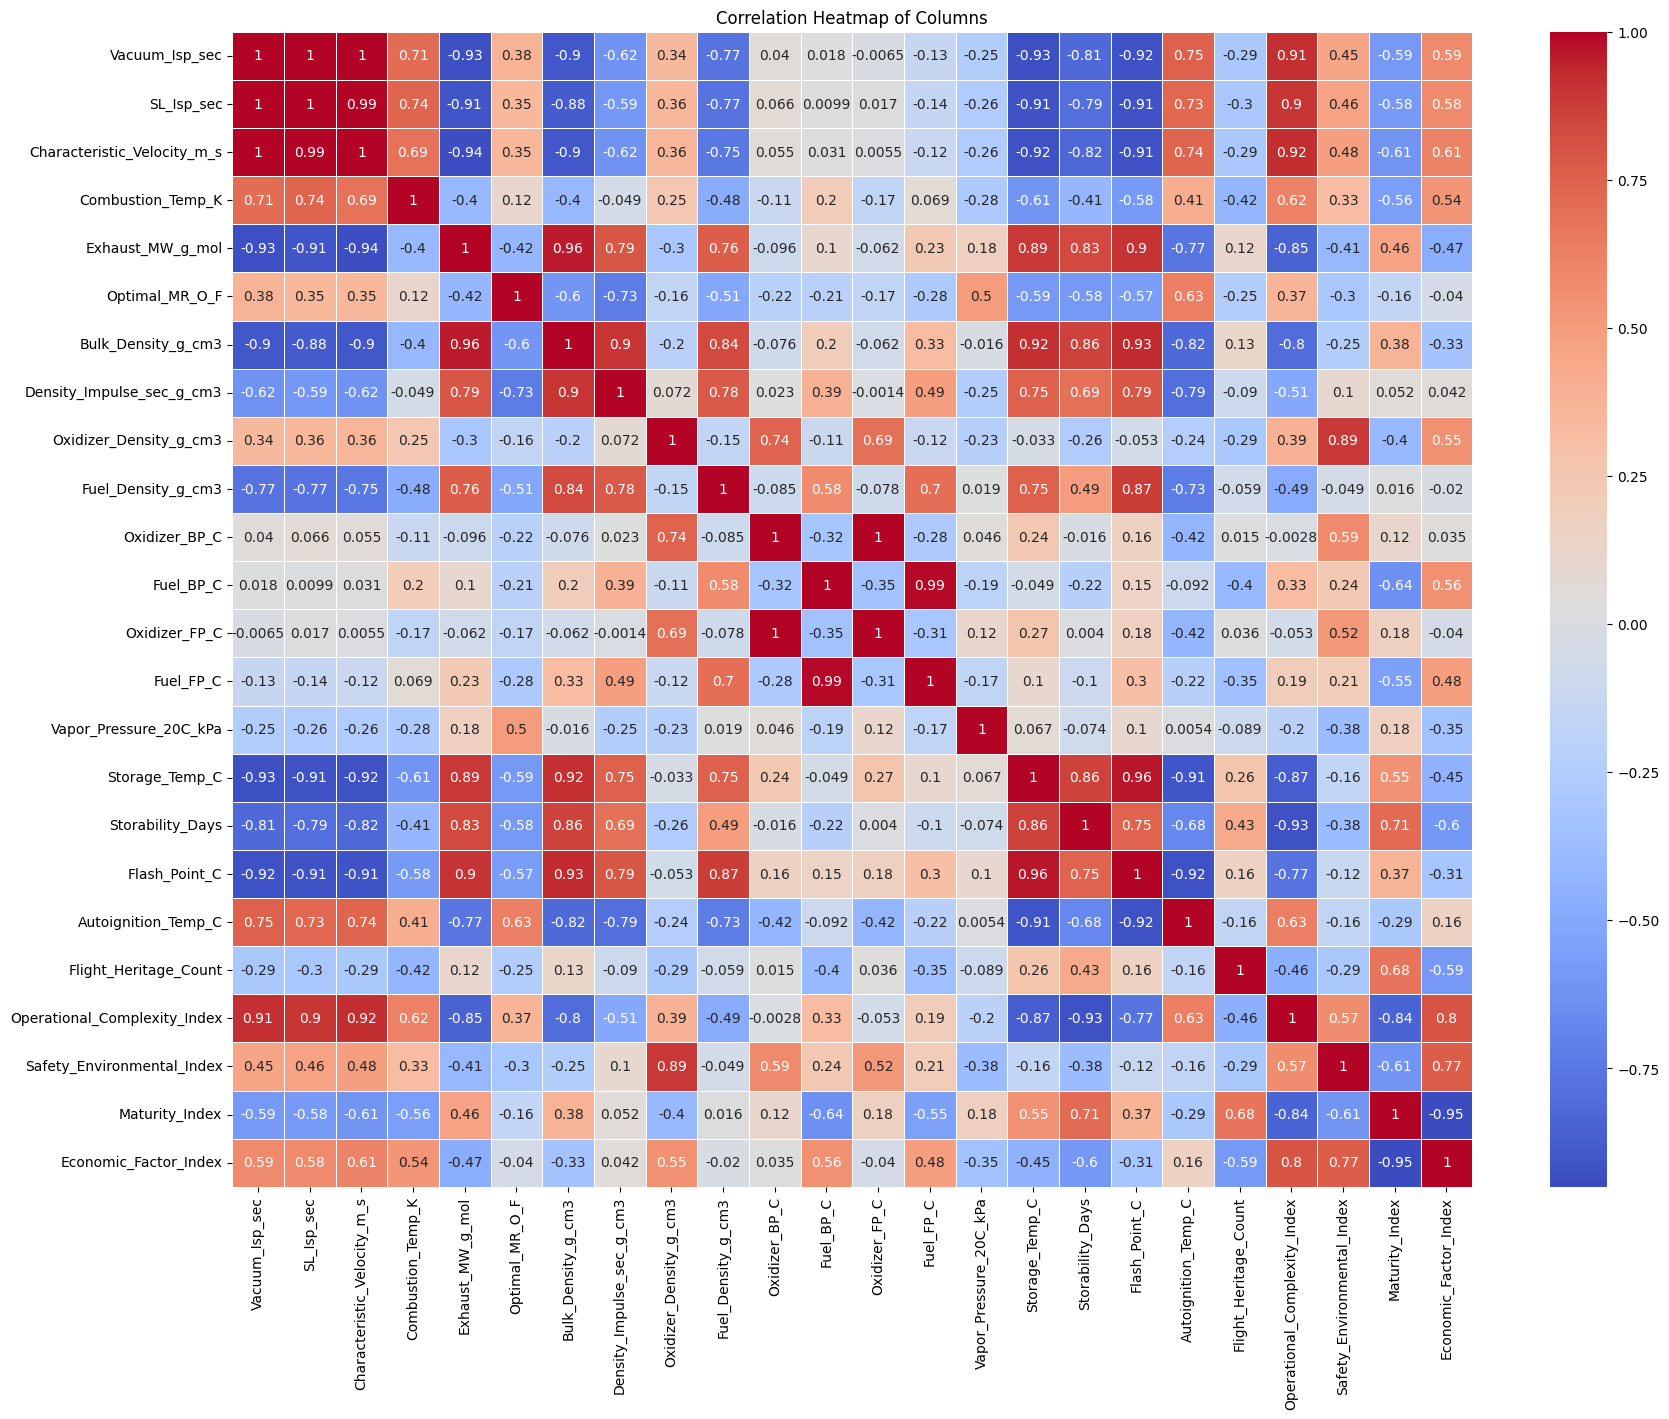

In [119]:
n = X_scaled.shape[0]
XTX = (X_scaled.T @ X_scaled) / (n - 1)

plt.figure(figsize=(20, 15))
sns.heatmap(XTX.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Columns')
plt.show()

In [120]:
eigvals, eigvecs = np.linalg.eig(XTX)

order = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[order]
eigvecs_sorted = eigvecs[:, order]

print("Eigenvalues (from largest to smallest):")
for i, val in enumerate(eigvals_sorted, 1):
    print(f"PC{i}: {val:.4f}")



Eigenvalues (from largest to smallest):
PC1: 7.7916
PC2: 4.5014
PC3: 3.1997
PC4: 2.0734
PC5: 1.5438
PC6: 1.2646
PC7: 0.8084
PC8: 0.6485
PC9: 0.6239
PC10: 0.4287
PC11: 0.3011
PC12: 0.2478
PC13: 0.1669
PC14: 0.1107
PC15: 0.0903
PC16: 0.0666
PC17: 0.0368
PC18: 0.0322
PC19: 0.0298
PC20: 0.0159
PC21: 0.0085
PC22: 0.0060
PC23: 0.0023
PC24: 0.0010


In [121]:
eigvecs_df = pd.DataFrame(
    eigvecs_sorted,
    index=X.columns,
    columns=[f"PC{i}" for i in range(1, len(eigvals_sorted)+1)]
)

print("Eigenvectors (columns are principal components):")
print(eigvecs_df.round(4).to_markdown(index=True))

Eigenvectors (columns are principal components):
|                              |     PC1 |     PC2 |     PC3 |     PC4 |     PC5 |     PC6 |     PC7 |     PC8 |     PC9 |    PC10 |    PC11 |    PC12 |    PC13 |    PC14 |    PC15 |    PC16 |    PC17 |    PC18 |    PC19 |    PC20 |    PC21 |    PC22 |    PC23 |    PC24 |
|:-----------------------------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
| Vacuum_Isp_sec               |  0.3295 | -0.083  |  0.061  |  0.1815 | -0.0129 | -0.1105 | -0.0302 | -0.0196 |  0.021  | -0.1059 |  0.1193 |  0.1816 |  0.1428 | -0.0735 |  0.0682 | -0.0379 |  0.0314 |  0.0742 |  0.2497 |  0.2427 |  0.2592 |  0.0263 |  0.2116 | -0.7093 |
| SL_Isp_sec                   |  0.3161 | -0.0962 |  0.0829 |  0.2265 | -0.056  | -0.1437 | -0.0573 | -0.0212 | -0.0382 | -0.0656 |

In [122]:
p1 = eigvecs_sorted[:, 0]
p2 = eigvecs_sorted[:, 1]

# P^T Loadings
loadings = pd.DataFrame(
    np.column_stack([p1, p2]),
    index=X.columns,
    columns=['p1 (PC1)', 'p2 (PC2)']
)

print(loadings.round(4))

# T scores
t1 = X_scaled @ p1
t2 = X_scaled @ p2


                              p1 (PC1)  p2 (PC2)
Vacuum_Isp_sec                  0.3295   -0.0830
SL_Isp_sec                      0.3161   -0.0962
Characteristic_Velocity_m_s     0.3308   -0.0954
Combustion_Temp_K               0.1169   -0.1583
Exhaust_MW_g_mol               -0.2848   -0.0536
Optimal_MR_O_F                  0.0900    0.1402
Bulk_Density_g_cm3             -0.2993   -0.1540
Density_Impulse_sec_g_cm3      -0.1783   -0.3031
Oxidizer_Density_g_cm3          0.0498   -0.2587
Fuel_Density_g_cm3             -0.2118   -0.2414
Oxidizer_BP_C                  -0.0063   -0.1603
Fuel_BP_C                      -0.0030   -0.2940
Oxidizer_FP_C                  -0.0133   -0.1364
Fuel_FP_C                      -0.0344   -0.3029
Vapor_Pressure_20C_kPa         -0.0216    0.0687
Storage_Temp_C                 -0.3158   -0.0956
Storability_Days               -0.2298    0.0370
Flash_Point_C                  -0.2941   -0.1525
Autoignition_Temp_C             0.2027    0.2033
Flight_Heritage_Coun

In [123]:
# Variance Explained R2
total_var = np.sum(eigvals_sorted)
R2 = eigvals_sorted / total_var
totalR2 = np.cumsum(R2)
percentages = [f"{val*100:.1f}%" for val in totalR2]
R2_df = pd.DataFrame({"Eigenvalue": eigvals_sorted, "R2": R2, "Cumulative R2": totalR2, "in %": percentages},
                     index=[f"PC{i}" for i in range(1, len(eigvals_sorted)+1)])
print("Variance Explained (R² for each component):")
print(R2_df.round(4))

Variance Explained (R² for each component):
      Eigenvalue      R2  Cumulative R2    in %
PC1       7.7916  0.3247         0.3247   32.5%
PC2       4.5014  0.1876         0.5122   51.2%
PC3       3.1997  0.1333         0.6455   64.6%
PC4       2.0734  0.0864         0.7319   73.2%
PC5       1.5438  0.0643         0.7962   79.6%
PC6       1.2646  0.0527         0.8489   84.9%
PC7       0.8084  0.0337         0.8826   88.3%
PC8       0.6485  0.0270         0.9096   91.0%
PC9       0.6239  0.0260         0.9356   93.6%
PC10      0.4287  0.0179         0.9535   95.3%
PC11      0.3011  0.0125         0.9660   96.6%
PC12      0.2478  0.0103         0.9764   97.6%
PC13      0.1669  0.0070         0.9833   98.3%
PC14      0.1107  0.0046         0.9879   98.8%
PC15      0.0903  0.0038         0.9917   99.2%
PC16      0.0666  0.0028         0.9945   99.4%
PC17      0.0368  0.0015         0.9960   99.6%
PC18      0.0322  0.0013         0.9973   99.7%
PC19      0.0298  0.0012         0.9986   99

## 5) NIPALS Algorithm

In [124]:
# NIPALS Algorithm Implementation
class NIPALS_PCA:
    def __init__(self, n_components=10, max_iter=1000, tol=1e-6):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.components_ = None
        self.scores_ = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None

    def fit_transform(self, X):
        n_samples, n_features = X.shape
        X_work = X.copy() # X_work is a DataFrame

        scores = np.zeros((n_samples, self.n_components))
        loadings = np.zeros((n_features, self.n_components))
        eigenvalues = np.zeros(self.n_components)

        print("\nNIPALS Iteration Progress:")
        print("-"*80)

        for comp in range(self.n_components):
            # Initialize score vector with first column of X_work
            t = X_work.iloc[:, 0].values.reshape(-1, 1) # t is a NumPy array
            t_old = t + 1  # Ensure at least one iteration

            iteration = 0
            while np.linalg.norm(t - t_old) > self.tol and iteration < self.max_iter:
                t_old = t.copy()

                # Calculate loadings, ensuring p is a NumPy array
                p_numerator = X_work.values.T @ t
                p_denominator = t.T @ t
                p = p_numerator / p_denominator
                p = p / np.linalg.norm(p)  # Normalize

                # Calculate scores, ensuring t is a NumPy array
                t_numerator = X_work.values @ p
                t_denominator = p.T @ p
                t = t_numerator / t_denominator

                iteration += 1

            # Store results - t and p are now guaranteed to be NumPy arrays
            scores[:, comp] = t.ravel()
            loadings[:, comp] = p.ravel()
            eigenval = (t.T @ t / n_samples)[0, 0]
            eigenvalues[comp] = eigenval

            # Deflate X_work (still a DataFrame, so use .values for calculations)
            X_work = X_work - (t @ p.T)

            print(f"PC{comp+1}: converged in {iteration} iterations, eigenvalue = {eigenvalues[comp]:.4f}")

        self.components_ = loadings.T
        self.scores_ = scores
        self.explained_variance_ = eigenvalues.ravel()
        total_var = np.sum(self.explained_variance_)
        self.explained_variance_ratio_ = self.explained_variance_ / total_var

        return scores

In [125]:
print("="*80)
print("PCA ANALYSIS - METHOD 2: NIPALS ALGORITHM")
print("="*80)

# Apply NIPALS
n_comp_nipals = min(10, X_scaled.shape[1])
nipals_pca = NIPALS_PCA(n_components=n_comp_nipals)
X_pca_nipals = nipals_pca.fit_transform(X_scaled)

print("\nNIPALS Results:")
print("-"*80)
print(f"{'PC':<5} {'Eigenvalue':<15} {'Explained Var':<15} {'Cumulative Var':<15}")
print("-"*80)
cumulative_nipals = np.cumsum(nipals_pca.explained_variance_ratio_)
for i in range(len(nipals_pca.explained_variance_)):
    print(f"PC{i+1:<3} {nipals_pca.explained_variance_[i]:<15.4f} "
          f"{nipals_pca.explained_variance_ratio_[i]:<15.4f} {cumulative_nipals[i]:<15.4f}")

PCA ANALYSIS - METHOD 2: NIPALS ALGORITHM

NIPALS Iteration Progress:
--------------------------------------------------------------------------------
PC1: converged in 28 iterations, eigenvalue = 7.6803
PC2: converged in 45 iterations, eigenvalue = 4.4371
PC3: converged in 39 iterations, eigenvalue = 3.1540
PC4: converged in 43 iterations, eigenvalue = 2.0437
PC5: converged in 84 iterations, eigenvalue = 1.5217
PC6: converged in 32 iterations, eigenvalue = 1.2466
PC7: converged in 64 iterations, eigenvalue = 0.7968
PC8: converged in 324 iterations, eigenvalue = 0.6393
PC9: converged in 44 iterations, eigenvalue = 0.6150
PC10: converged in 42 iterations, eigenvalue = 0.4226

NIPALS Results:
--------------------------------------------------------------------------------
PC    Eigenvalue      Explained Var   Cumulative Var 
--------------------------------------------------------------------------------
PC1   7.6803          0.3405          0.3405         
PC2   4.4371          0.1967  

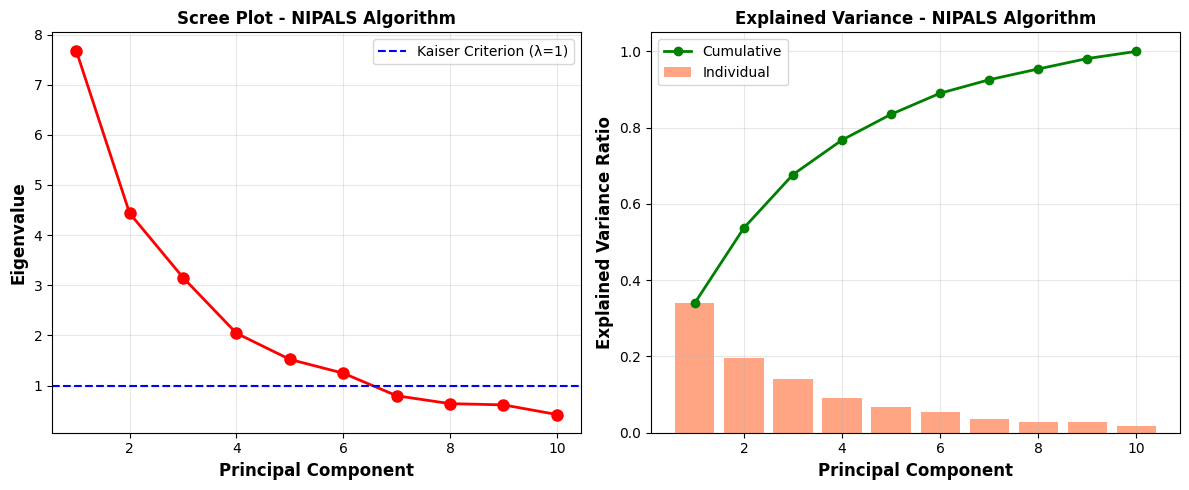

In [126]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Scree plot
ax = axes[0]
pc_range = range(1, len(nipals_pca.explained_variance_) + 1)
ax.plot(pc_range, nipals_pca.explained_variance_, 'ro-', linewidth=2, markersize=8)
ax.set_xlabel('Principal Component', fontweight='bold', fontsize=12)
ax.set_ylabel('Eigenvalue', fontweight='bold', fontsize=12)
ax.set_title('Scree Plot - NIPALS Algorithm', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=1, color='b', linestyle='--', label='Kaiser Criterion (λ=1)')
ax.legend()

# 2. Explained variance ratio
ax = axes[1]
ax.bar(pc_range, nipals_pca.explained_variance_ratio_, alpha=0.7, color='coral',
       label='Individual')
ax.plot(pc_range, cumulative_nipals, 'go-', linewidth=2, markersize=6, label='Cumulative')
ax.set_xlabel('Principal Component', fontweight='bold', fontsize=12)
ax.set_ylabel('Explained Variance Ratio', fontweight='bold', fontsize=12)
ax.set_title('Explained Variance - NIPALS Algorithm', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Score Plot - [PC1 vs PC2]

*Also shows Hotelling T-squared

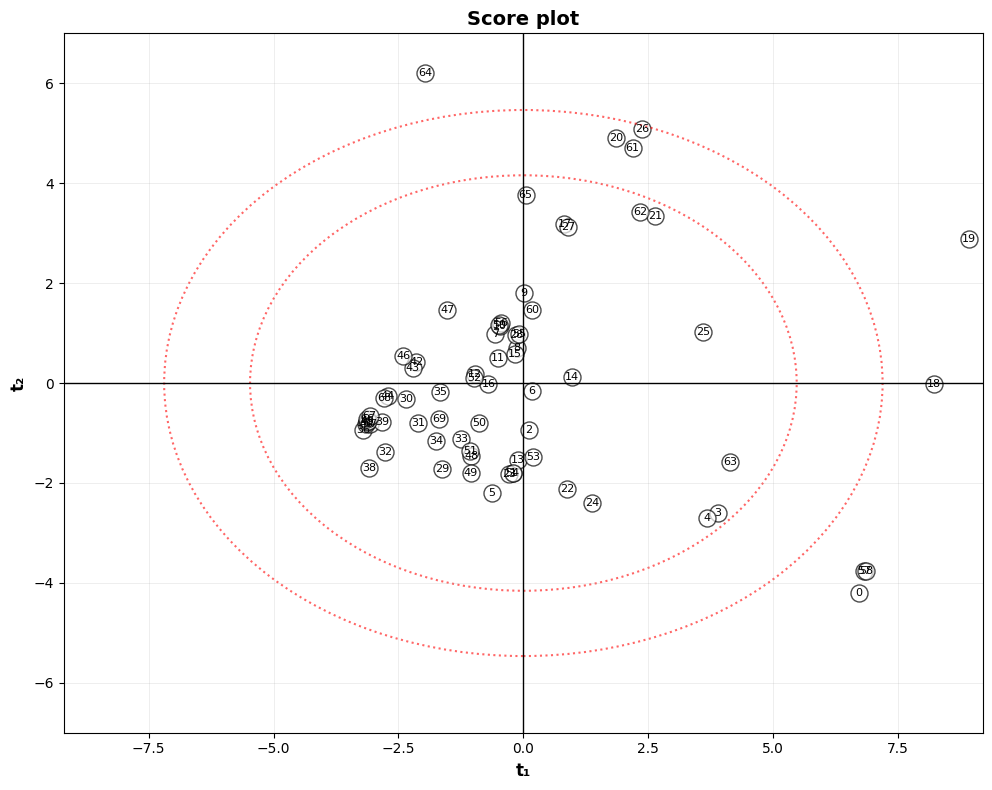

In [127]:
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
scatter = ax.scatter(X_pca_nipals[:, 0], X_pca_nipals[:, 1],
                     c='white', edgecolors='black',
                     s=150, alpha=0.7, linewidths=1)

# Add propellant IDs as text labels for each point
for i in range(len(X_pca_nipals)):
    ax.text(X_pca_nipals[i, 0], X_pca_nipals[i, 1],
            str(i), fontsize=8, ha='center', va='center')

# Add grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Add axis lines through origin (centered at mean)
mean_pc1 = np.mean(X_pca_nipals[:, 0])
mean_pc2 = np.mean(X_pca_nipals[:, 1])

ax.axhline(y=mean_pc2, color='black', linewidth=1)
ax.axvline(x=mean_pc1, color='black', linewidth=1)

# Calculate confidence ellipses (90% and 95%)
from matplotlib.patches import Ellipse
from scipy import stats
from matplotlib import transforms

def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', edgecolor='red', linestyle='--', **kwargs):
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, edgecolor=edgecolor, linestyle=linestyle, **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std

    transf = transforms.Affine2D() \
        .scale(scale_x, scale_y) \
        .translate(np.mean(x), np.mean(y))

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Add confidence ellipses
# 95% confidence (1.96 std)
confidence_ellipse(X_pca_nipals[:, 0], X_pca_nipals[:, 1], ax, n_std=1.96,
                   edgecolor='red', linestyle=':', linewidth=1.5, alpha=0.6)
# 99% confidence (2.576 std)
confidence_ellipse(X_pca_nipals[:, 0], X_pca_nipals[:, 1], ax, n_std=2.576,
                   edgecolor='red', linestyle=':', linewidth=1.5, alpha=0.6)

# Set axis limits
ax.set_xlim(-9.2, 9.2)
ax.set_ylim(-7, 7)

# Labels
ax.set_xlabel(f't₁', fontweight='bold', fontsize=12)
ax.set_ylabel(f't₂', fontweight='bold', fontsize=12)
ax.set_title('Score plot', fontsize=14, fontweight='bold')

# Equal aspect ratio for circular appearance
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

In [128]:

# Find outliers outside 99% confidence ellipse
def is_outside_ellipse(x, y, n_std=2.576):
    """
    Check if points are outside the confidence ellipse
    """
    cov = np.cov(x, y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate Mahalanobis distance
    inv_cov = np.linalg.inv(cov)
    distances = []

    for i in range(len(x)):
        diff = np.array([x[i] - mean_x, y[i] - mean_y])
        mahal_dist = np.sqrt(diff.T @ inv_cov @ diff)
        distances.append(mahal_dist)

    # Points outside n_std
    outliers = np.array(distances) > n_std
    return outliers, distances

outliers, distances = is_outside_ellipse(X_pca_nipals[:, 0], X_pca_nipals[:, 1], n_std=2.576)

outlier_ids = np.where(outliers)[0]
print(f"\nPropellant IDs outside 99% confidence ellipse: {outlier_ids.tolist()}")
print(f"Number of outliers: {len(outlier_ids)}")
print(f"\nOutlier details:")
for idx in outlier_ids:
    print(f"Propellant ID {idx}: PC1={X_pca_nipals[idx, 0]:.3f}, PC2={X_pca_nipals[idx, 1]:.3f}, Mahalanobis Distance={distances[idx]:.3f}")


Propellant IDs outside 99% confidence ellipse: [0, 18, 19, 57, 58, 64]
Number of outliers: 6

Outlier details:
Propellant ID 0: PC1=6.715, PC2=-4.208, Mahalanobis Distance=3.118
Propellant ID 18: PC1=8.226, PC2=-0.011, Mahalanobis Distance=2.947
Propellant ID 19: PC1=8.916, PC2=2.883, Mahalanobis Distance=3.471
Propellant ID 57: PC1=6.822, PC2=-3.758, Mahalanobis Distance=3.018
Propellant ID 58: PC1=6.863, PC2=-3.768, Mahalanobis Distance=3.033
Propellant ID 64: PC1=-1.959, PC2=6.207, Mahalanobis Distance=3.009


In [129]:
selected_ids = [0, 18, 19, 57, 58, 64]
selected_data = df_composite.loc[selected_ids]
display(selected_data)

,Propellant_ID,Propellant_Name,Propellant_Type,Chemical_Family,Country_Origin,Vacuum_Isp_sec,SL_Isp_sec,Characteristic_Velocity_m_s,Combustion_Temp_K,Exhaust_MW_g_mol,...,Autoignition_Temp_C,Restartable_Binary,Throttleable_Binary,Flight_Heritage_Count,Application_Primary,Notes,Operational_Complexity_Index,Safety_Environmental_Index,Maturity_Index,Economic_Factor_Index
0,1,LOX+LH2,Liquid_Biprop,Cryogenic,USA,451,391,2435,2985,10.0,...,560,1,1,5000,Upper_Stage,Highest performance cryogenic,8.5,2.1,10.00,3
18,19,F2+LH2,Liquid_Biprop,Exotic,USA,465,410,2550,4200,14.0,...,560,1,1,5,Experimental,Extremely hazardous,10.0,9.4,2.50,9
19,20,Li+F2+H2_Triprop,Tripropellant,Exotic,USA,542,470,2950,4500,12.0,...,560,0,0,1,Experimental,Highest Isp record impractical,10.0,10.0,1.25,10
57,58,LOX+LH2_ISRO,Liquid_Biprop,Cryogenic,India,448,388,2425,2975,10.2,...,560,1,1,50,Upper_Stage,ISRO CE-7.5 CE-20 cryogenic,8.5,2.1,10.00,4
58,59,LOX+LH2_JAXA,Liquid_Biprop,Cryogenic,Japan,450,390,2430,2980,10.1,...,560,1,1,200,Upper_Stage,JAXA LE-5 LE-7 H-II,8.5,2.1,10.00,4
64,65,Iron_Slurry+LOX,Liquid_Biprop,Metallized,USA,285,255,1700,3300,30.0,...,270,0,0,0,Experimental,High density low performance,9.0,5.9,2.50,7


# **PLS on the dataset**

In [130]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [131]:
df_pls = df_composite.copy()
df_pls.head()

,Propellant_ID,Propellant_Name,Propellant_Type,Chemical_Family,Country_Origin,Vacuum_Isp_sec,SL_Isp_sec,Characteristic_Velocity_m_s,Combustion_Temp_K,Exhaust_MW_g_mol,...,Autoignition_Temp_C,Restartable_Binary,Throttleable_Binary,Flight_Heritage_Count,Application_Primary,Notes,Operational_Complexity_Index,Safety_Environmental_Index,Maturity_Index,Economic_Factor_Index
0,1,LOX+LH2,Liquid_Biprop,Cryogenic,USA,451,391,2435,2985,10.0,...,560,1,1,5000,Upper_Stage,Highest performance cryogenic,8.5,2.10,10.00,3
1,2,LOX+RP-1,Liquid_Biprop,Hydrocarbon,USA,311,282,1780,3670,23.2,...,210,1,1,8000,First_Stage,SpaceX Falcon 9,5.5,2.25,10.00,2
2,3,LOX+RP-2,Liquid_Biprop,Hydrocarbon,USA,316,285,1795,3680,23.0,...,215,1,1,200,First_Stage,Refined kerosene variant,5.5,2.25,8.75,3
3,4,LOX+CH4,Liquid_Biprop,Cryogenic,USA,369,334,2180,3310,16.6,...,537,1,1,500,First_Stage,SpaceX Starship Raptor,7.5,2.00,10.00,4
4,5,LOX+LNG,Liquid_Biprop,Cryogenic,USA,363,330,2150,3290,17.2,...,540,1,1,100,First_Stage,Blue Origin BE-4,7.5,2.00,10.00,3


In [132]:
# Drop irrelevant columns
irrelevant_cols = ['Propellant_Name', 'Notes', 'Country_Origin']
if 'Propellant_ID' in df_pls.columns:
    irrelevant_cols.append('Propellant_ID')

df_pls = df_pls.drop(columns=irrelevant_cols, errors='ignore')

# Separate features
numerical_cols = df_pls.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_pls.select_dtypes(include=['object']).columns.tolist()

Encoding Categorical data

In [133]:
# Encode target variables
le_propellant_type = LabelEncoder()
le_application = LabelEncoder()

df_pls['Propellant_Type_encoded'] = le_propellant_type.fit_transform(
    df_pls['Propellant_Type'].astype(str)
)
df_pls['Application_Primary_encoded'] = le_application.fit_transform(
    df_pls['Application_Primary'].astype(str)
)

print("Propellant_Type classes:")
print(list(le_propellant_type.classes_))
print(f"\nApplication_Primary classes ({len(le_application.classes_)}):")
print(list(le_application.classes_))

Propellant_Type classes:
['Hybrid', 'Liquid_Biprop', 'Monopropellant', 'Solid_Propellant', 'Tripropellant']

Application_Primary classes (16):
['Booster', 'Experimental', 'First_Stage', 'Historical', 'ISRU_Candidate', 'Micropropulsion', 'Mobile_Launch', 'Orbital_Maneuvering', 'Quick_Response', 'RCS', 'Research', 'Satellite_RCS', 'Small_Launch', 'Tactical', 'Tactical_Missile', 'Upper_Stage']


## Class Distribution

In [134]:
print("\nPropellant_Type distribution:")
prop_type_dist = df_pls['Propellant_Type'].value_counts()
print(prop_type_dist)
print(f"\nClass imbalance ratio (max/min): {prop_type_dist.max() / prop_type_dist.min():.2f}")

print("\nApplication_Primary distribution:")
app_dist = df_pls['Application_Primary'].value_counts()
print(app_dist)
print(f"\nClass imbalance ratio (max/min): {app_dist.max() / app_dist.min():.2f}")


Propellant_Type distribution:
Propellant_Type
Liquid_Biprop       39
Solid_Propellant    15
Monopropellant       8
Hybrid               7
Tripropellant        1
Name: count, dtype: int64

Class imbalance ratio (max/min): 39.00

Application_Primary distribution:
Application_Primary
Experimental           16
First_Stage            12
Research               10
Upper_Stage             7
Booster                 5
RCS                     4
Tactical                4
Satellite_RCS           3
Tactical_Missile        2
Historical              1
ISRU_Candidate          1
Orbital_Maneuvering     1
Small_Launch            1
Micropropulsion         1
Mobile_Launch           1
Quick_Response          1
Name: count, dtype: int64

Class imbalance ratio (max/min): 16.00


In [135]:
df_pls[df_pls['Propellant_Type'] == 'Tripropellant']


,Propellant_Type,Chemical_Family,Vacuum_Isp_sec,SL_Isp_sec,Characteristic_Velocity_m_s,Combustion_Temp_K,Exhaust_MW_g_mol,Optimal_MR_O_F,Bulk_Density_g_cm3,Density_Impulse_sec_g_cm3,...,Restartable_Binary,Throttleable_Binary,Flight_Heritage_Count,Application_Primary,Operational_Complexity_Index,Safety_Environmental_Index,Maturity_Index,Economic_Factor_Index,Propellant_Type_encoded,Application_Primary_encoded
19,Tripropellant,Exotic,542,470,2950,4500,12.0,2.8,0.48,260,...,0,0,1,Experimental,10.0,10.0,1.25,10,4,1


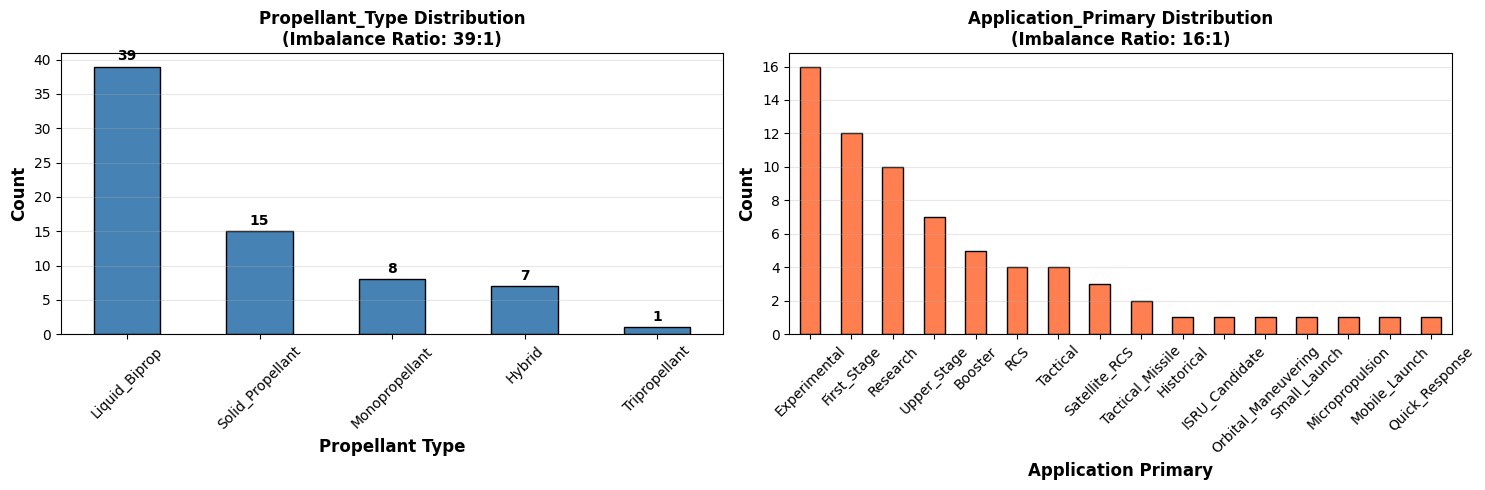

In [136]:
# Visualize class distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Propellant_Type
ax = axes[0]
prop_type_dist.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_xlabel('Propellant Type', fontweight='bold', fontsize=12)
ax.set_ylabel('Count', fontweight='bold', fontsize=12)
ax.set_title('Propellant_Type Distribution\n(Imbalance Ratio: 39:1)',
             fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(prop_type_dist.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# Application_Primary
ax = axes[1]
app_dist.plot(kind='bar', ax=ax, color='coral', edgecolor='black')
ax.set_xlabel('Application Primary', fontweight='bold', fontsize=12)
ax.set_ylabel('Count', fontweight='bold', fontsize=12)
ax.set_title('Application_Primary Distribution\n(Imbalance Ratio: 16:1)',
             fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [137]:
# Remove Tripropellant
filtered_df = df_pls[df_pls['Propellant_Type'] != 'Tripropellant'].copy()

# Define categories to keep as-is
keep_categories = ['Experimental', 'First_Stage', 'Research', 'Upper_Stage',
                   'Booster', 'RCS', 'Tactical']
filtered_df = filtered_df[filtered_df['Application_Primary'].isin(keep_categories)]

'''
# Create new column with grouping
filtered_df['Application_Primary'] = filtered_df['Application_Primary'].apply(
    lambda x: x if x in keep_categories else 'Specialty'
)
'''
filtered_df.head()

,Propellant_Type,Chemical_Family,Vacuum_Isp_sec,SL_Isp_sec,Characteristic_Velocity_m_s,Combustion_Temp_K,Exhaust_MW_g_mol,Optimal_MR_O_F,Bulk_Density_g_cm3,Density_Impulse_sec_g_cm3,...,Restartable_Binary,Throttleable_Binary,Flight_Heritage_Count,Application_Primary,Operational_Complexity_Index,Safety_Environmental_Index,Maturity_Index,Economic_Factor_Index,Propellant_Type_encoded,Application_Primary_encoded
0,Liquid_Biprop,Cryogenic,451,391,2435,2985,10.0,5.50,0.36,162,...,1,1,5000,Upper_Stage,8.5,2.10,10.00,3,1,15
1,Liquid_Biprop,Hydrocarbon,311,282,1780,3670,23.2,2.56,1.03,320,...,1,1,8000,First_Stage,5.5,2.25,10.00,2,1,2
2,Liquid_Biprop,Hydrocarbon,316,285,1795,3680,23.0,2.50,1.05,332,...,1,1,200,First_Stage,5.5,2.25,8.75,3,1,2
3,Liquid_Biprop,Cryogenic,369,334,2180,3310,16.6,3.50,0.82,303,...,1,1,500,First_Stage,7.5,2.00,10.00,4,1,2
4,Liquid_Biprop,Cryogenic,363,330,2150,3290,17.2,3.40,0.84,305,...,1,1,100,First_Stage,7.5,2.00,10.00,3,1,2


In [138]:
filtered_df.shape

(57, 32)

In [139]:
# Encode remaining categorical features
#df_encoded = df_pls.copy()
df_encoded = filtered_df.copy()
le_dict = {}

for col in categorical_cols:
    if col not in ['Propellant_Type', 'Application_Primary'] and col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col].astype(str))
        le_dict[col] = le
        print(f"Encoded {col}")

# Select features for PLS (exclude target variables)
features_for_pls = numerical_cols.copy()

# Add encoded categoricals (except targets)
for col in categorical_cols:
    if col not in ['Propellant_Type', 'Application_Primary']:
        if col + '_encoded' in df_encoded.columns:
            features_for_pls.append(col + '_encoded')

print(f"\nTotal features for PLS: {len(features_for_pls)}")


X = df_encoded[features_for_pls].values
y_propellant = filtered_df['Propellant_Type_encoded'].values
le_application_grouped = LabelEncoder()
y_application = le_application_grouped.fit_transform(filtered_df['Application_Primary'].values)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Data standardized: mean \u2248 {X_scaled.mean():.6f}, std \u2248 {X_scaled.std():.6f}")

Encoded Chemical_Family

Total features for PLS: 28
Data standardized: mean ≈ -0.000000, std ≈ 1.000000


Adjusting Weights of Categorical Values

In [140]:
# Class weights for Propellant_Type
propellant_classes = np.unique(y_propellant)
propellant_class_weights = compute_class_weight(
    'balanced',
    classes=propellant_classes,
    y=y_propellant
)
propellant_weight_dict = dict(zip(propellant_classes, propellant_class_weights))

print("\nPropellant_Type class weights:")
for cls, weight in propellant_weight_dict.items():
    cls_name = le_propellant_type.inverse_transform([cls])[0]
    count = (y_propellant == cls).sum()
    print(f"  {cls_name:<20} (n={count:>2}): weight = {weight:.4f}")

# Class weights for Application_Primary
application_classes = np.unique(y_application)
application_class_weights = compute_class_weight(
    'balanced',
    classes=application_classes,
    y=y_application
)
application_weight_dict = dict(zip(application_classes, application_class_weights))

print("\nApplication_Primary class weights:")
app_weights_sorted = sorted(
    application_weight_dict.items(),
    key=lambda x: x[1],
    reverse=True
)
for cls, weight in app_weights_sorted[:10]:
    # Use the new le_application_grouped for inverse transformation here
    cls_name = le_application_grouped.inverse_transform([cls])[0]
    count = (y_application == cls).sum()
    print(f"  {cls_name:<20} (n={count:>2}): weight = {weight:.4f}")


Propellant_Type class weights:
  Hybrid               (n= 7): weight = 2.0357
  Liquid_Biprop        (n=33): weight = 0.4318
  Monopropellant       (n= 5): weight = 2.8500
  Solid_Propellant     (n=12): weight = 1.1875

Application_Primary class weights:
  RCS                  (n= 4): weight = 2.0357
  Tactical             (n= 4): weight = 2.0357
  Booster              (n= 5): weight = 1.6286
  Upper_Stage          (n= 7): weight = 1.1633
  Research             (n=10): weight = 0.8143
  First_Stage          (n=12): weight = 0.6786
  Experimental         (n=15): weight = 0.5429


In [141]:
# Compute sample weights
sample_weights_propellant = np.array(
    [propellant_weight_dict[y] for y in y_propellant])
sample_weights_application = np.array(
    [application_weight_dict[y] for y in y_application]
)

# Combined sample weights (average of both targets)
sample_weights_combined = (sample_weights_propellant + sample_weights_application) / 2

print(f"\nSample weights statistics (combined):")
print(f"  Mean: {sample_weights_combined.mean():.4f}")
print(f"  Std:  {sample_weights_combined.std():.4f}")
print(f"  Min:  {sample_weights_combined.min():.4f}")
print(f"  Max:  {sample_weights_combined.max():.4f}")


Sample weights statistics (combined):
  Mean: 1.0000
  Std:  0.5260
  Min:  0.4873
  Max:  2.4429


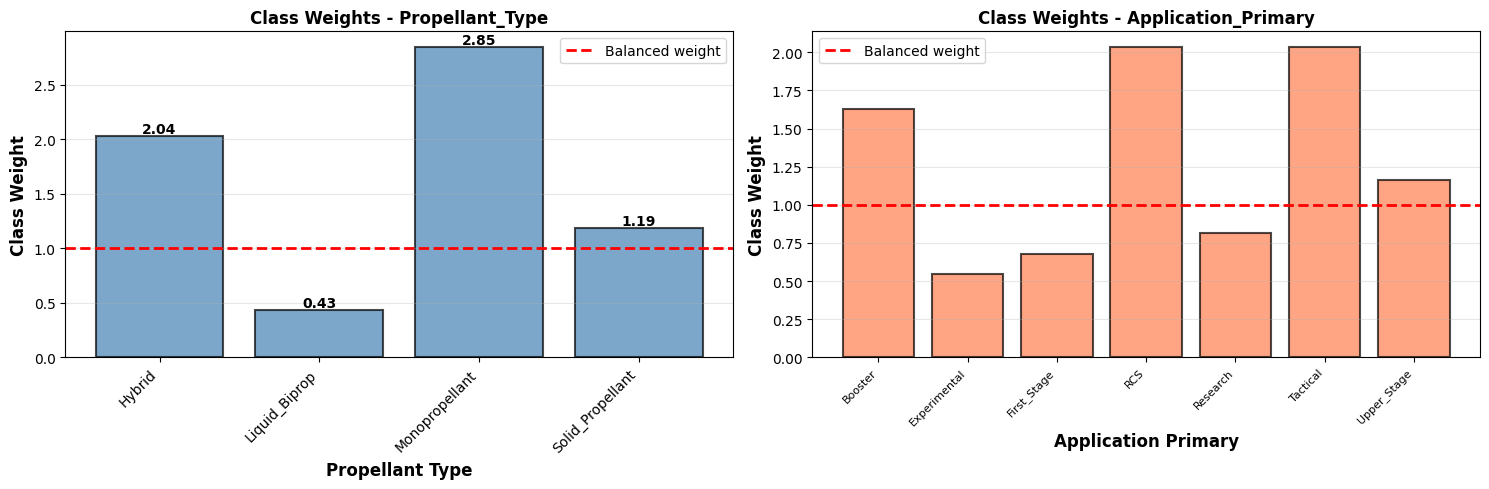

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Propellant_Type weights
ax = axes[0]
classes_prop = [le_propellant_type.inverse_transform([c])[0] for c in propellant_classes]
weights_prop = [propellant_weight_dict[c] for c in propellant_classes]
bars = ax.bar(range(len(classes_prop)), weights_prop, color='steelblue',
              alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(classes_prop)))
ax.set_xticklabels(classes_prop, rotation=45, ha='right')
ax.set_xlabel('Propellant Type', fontweight='bold', fontsize=12)
ax.set_ylabel('Class Weight', fontweight='bold', fontsize=12)
ax.set_title('Class Weights - Propellant_Type', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=1.0, color='r', linestyle='--', linewidth=2, label='Balanced weight')
ax.legend()

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Application_Primary weights
ax = axes[1]
classes_app = [le_application_grouped.inverse_transform([c])[0] for c in application_classes]
weights_app = [application_weight_dict[c] for c in application_classes]
bars = ax.bar(range(len(classes_app)), weights_app, color='coral',
              alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(classes_app)))
ax.set_xticklabels(classes_app, rotation=45, ha='right', fontsize=8)
ax.set_xlabel('Application Primary', fontweight='bold', fontsize=12)
ax.set_ylabel('Class Weight', fontweight='bold', fontsize=12)
ax.set_title('Class Weights - Application_Primary', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=1.0, color='r', linestyle='--', linewidth=2, label='Balanced weight')
ax.legend()

plt.tight_layout()
plt.show()

Train Test Split

In [143]:
# Check for classes with insufficient samples
prop_counts = Counter(y_propellant)
app_counts = Counter(y_application)

print("\nClasses with only 1 sample:")
print(f"Propellant_Type: {[k for k,v in prop_counts.items() if v < 2]}")
print(f"Application_Primary: {[k for k,v in app_counts.items() if v < 2]}")

# Regular split (stratification not possible with singleton classes)
X_train, X_test, y_prop_train, y_prop_test, y_app_train, y_app_test, weights_train, weights_test = train_test_split(
    X_scaled, y_propellant, y_application, sample_weights_combined,
    test_size=0.2, random_state=2, stratify=y_application,
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

print("\nPropellant_Type distribution in train set:")
train_prop_dist = pd.Series(y_prop_train).map(
    lambda x: le_propellant_type.inverse_transform([x])[0]
).value_counts()
print(train_prop_dist)

print("\nPropellant_Type distribution in test set:")
test_prop_dist = pd.Series(y_prop_test).map(
    lambda x: le_propellant_type.inverse_transform([x])[0]
).value_counts()
print(test_prop_dist)

print("\nApplication_Primary distribution in train set:")
train_app_dist = pd.Series(y_app_train).map(
    lambda x: le_application_grouped.inverse_transform([x])[0]
).value_counts()
print(train_app_dist)

print("\nApplication_Primary distribution in test set:")
test_app_dist = pd.Series(y_app_test).map(
    lambda x: le_application_grouped.inverse_transform([x])[0]
).value_counts()
print(test_app_dist)


Classes with only 1 sample:
Propellant_Type: []
Application_Primary: []

Training set: 45 samples
Test set: 12 samples

Propellant_Type distribution in train set:
Liquid_Biprop       26
Solid_Propellant    10
Hybrid               5
Monopropellant       4
Name: count, dtype: int64

Propellant_Type distribution in test set:
Liquid_Biprop       7
Hybrid              2
Solid_Propellant    2
Monopropellant      1
Name: count, dtype: int64

Application_Primary distribution in train set:
Experimental    12
First_Stage      9
Research         8
Upper_Stage      6
Booster          4
RCS              3
Tactical         3
Name: count, dtype: int64

Application_Primary distribution in test set:
First_Stage     3
Experimental    3
Research        2
RCS             1
Upper_Stage     1
Booster         1
Tactical        1
Name: count, dtype: int64


In [144]:
def apply_sample_weights(X, y, weights, seed=42):
    np.random.seed(seed)
    n_samples = len(weights)

    # Normalize weights to sum to n_samples
    normalized_weights = weights / weights.sum() * n_samples

    # Determine number of copies for each sample
    n_copies = np.floor(normalized_weights).astype(int)
    remainders = normalized_weights - n_copies

    # Randomly add additional copies based on remainders
    additional = np.random.rand(n_samples) < remainders
    n_copies = n_copies + additional.astype(int)

    # Replicate samples
    indices = np.repeat(np.arange(n_samples), n_copies)

    return X[indices], y[indices]



In [145]:
print("="*80)
print("COMPUTING TARGET-SPECIFIC SAMPLE WEIGHTS")
print("="*80)

# Propellant_Type weights for train set
weights_prop_train = np.array([propellant_weight_dict[y] for y in y_prop_train])

# Propellant_Type weights for test set
weights_prop_test = np.array([propellant_weight_dict[y] for y in y_prop_test])

# Application_Primary weights for train set
weights_app_train = np.array([application_weight_dict[y] for y in y_app_train])

# Application_Primary weights for test set
weights_app_test = np.array([application_weight_dict[y] for y in y_app_test])

print("\\nTarget-specific weights created:")
print(f"  Propellant train weights: mean={weights_prop_train.mean():.3f}, "
      f"range=[{weights_prop_train.min():.3f}, {weights_prop_train.max():.3f}]")
print(f"  Propellant test weights:  mean={weights_prop_test.mean():.3f}, "
      f"range=[{weights_prop_test.min():.3f}, {weights_prop_test.max():.3f}]")
print(f"  Application train weights: mean={weights_app_train.mean():.3f}, "
      f"range=[{weights_app_train.min():.3f}, {weights_app_train.max():.3f}]")
print(f"  Application test weights:  mean={weights_app_test.mean():.3f}, "
      f"range=[{weights_app_test.min():.3f}, {weights_app_test.max():.3f}]")



COMPUTING TARGET-SPECIFIC SAMPLE WEIGHTS
\nTarget-specific weights created:
  Propellant train weights: mean=0.993, range=[0.432, 2.850]
  Propellant test weights:  mean=1.027, range=[0.432, 2.850]
  Application train weights: mean=0.997, range=[0.543, 2.036]
  Application test weights:  mean=1.013, range=[0.543, 2.036]


one hot encoding target variable

In [146]:
# One-hot encode targets for PLS classification
ohe_propellant = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
y_prop_train_ohe = ohe_propellant.fit_transform(y_prop_train.reshape(-1, 1))
y_prop_test_ohe = ohe_propellant.transform(y_prop_test.reshape(-1, 1))

ohe_application = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
y_app_train_ohe = ohe_application.fit_transform(y_app_train.reshape(-1, 1))
y_app_test_ohe = ohe_application.transform(y_app_test.reshape(-1, 1))

print(f"Propellant_Type one-hot shape: {y_prop_train_ohe.shape}")
print(f"Application_Primary one-hot shape: {y_app_train_ohe.shape}")

Propellant_Type one-hot shape: (45, 4)
Application_Primary one-hot shape: (45, 7)


In [147]:
# Create weighted training sets
X_train_weighted, y_prop_train_ohe_weighted = apply_sample_weights(
    X_train, y_prop_train_ohe, weights_train
)

X_train_weighted_app, y_app_train_ohe_weighted = apply_sample_weights(
    X_train, y_app_train_ohe, weights_train
)

print(f"\nOriginal training size: {len(X_train)}")
print(f"Weighted training size (Propellant): {len(X_train_weighted)}")
print(f"Weighted training size (Application): {len(X_train_weighted_app)}")

max_components = min(15, X_train.shape[1], X_train.shape[0] - 1)
n_comp_range = range(1, max_components + 1)



Original training size: 45
Weighted training size (Propellant): 49
Weighted training size (Application): 49


In [148]:
# Propellant_Type component selection
print("\nOptimizing for Propellant_Type...")
weighted_scores_prop = []

for n_comp in n_comp_range:
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X_train_weighted, y_prop_train_ohe_weighted)
    y_pred = pls.predict(X_test)

    # Convert predictions back to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Weighted accuracy
    weighted_acc = accuracy_score(y_prop_test, y_pred_classes, sample_weight=weights_test)
    weighted_scores_prop.append(weighted_acc)

optimal_n_comp_prop = n_comp_range[np.argmax(weighted_scores_prop)]
print(f"Optimal components for Propellant_Type: {optimal_n_comp_prop}")
print(f"Best weighted accuracy: {max(weighted_scores_prop):.4f}")


Optimizing for Propellant_Type...
Optimal components for Propellant_Type: 4
Best weighted accuracy: 1.0000


In [149]:
# Application_Primary component selection
print("\nOptimizing for Application_Primary...")
weighted_scores_app = []

for n_comp in n_comp_range:
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X_train_weighted_app, y_app_train_ohe_weighted)
    y_pred = pls.predict(X_test)

    y_pred_classes = np.argmax(y_pred, axis=1)
    weighted_acc = accuracy_score(y_app_test, y_pred_classes, sample_weight=weights_test)
    weighted_scores_app.append(weighted_acc)

optimal_n_comp_app = n_comp_range[np.argmax(weighted_scores_app)]
print(f"Optimal components for Application_Primary: {optimal_n_comp_app}")
print(f"Best weighted accuracy: {max(weighted_scores_app):.4f}")

# Multi-target optimal
optimal_n_comp_multi = int(np.mean([optimal_n_comp_prop, optimal_n_comp_app]))
print(f"\nUsing {optimal_n_comp_multi} components for multi-target model")


Optimizing for Application_Primary...
Optimal components for Application_Primary: 8
Best weighted accuracy: 0.8031

Using 6 components for multi-target model


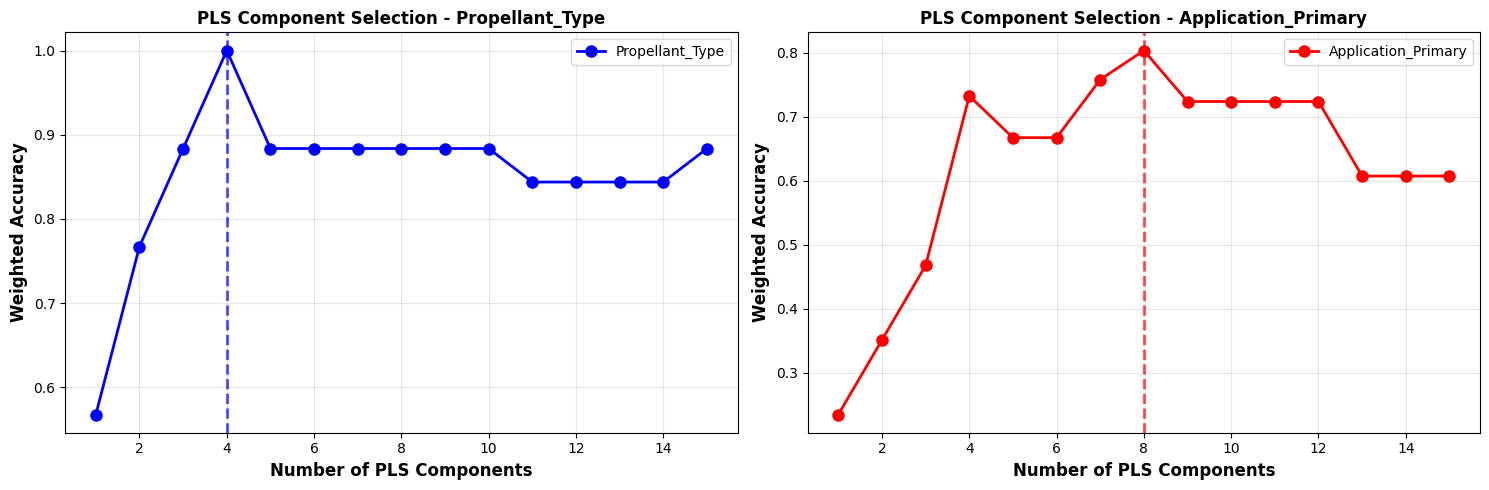

In [150]:
# Visualize component selection
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax = axes[0]
ax.plot(n_comp_range, weighted_scores_prop, 'bo-', linewidth=2, markersize=8,
        label='Propellant_Type')
ax.axvline(x=optimal_n_comp_prop, color='b', linestyle='--', alpha=0.7, linewidth=2)
ax.set_xlabel('Number of PLS Components', fontweight='bold', fontsize=12)
ax.set_ylabel('Weighted Accuracy', fontweight='bold', fontsize=12)
ax.set_title('PLS Component Selection - Propellant_Type', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1]
ax.plot(n_comp_range, weighted_scores_app, 'ro-', linewidth=2, markersize=8,
        label='Application_Primary')
ax.axvline(x=optimal_n_comp_app, color='r', linestyle='--', alpha=0.7, linewidth=2)
ax.set_xlabel('Number of PLS Components', fontweight='bold', fontsize=12)
ax.set_ylabel('Weighted Accuracy', fontweight='bold', fontsize=12)
ax.set_title('PLS Component Selection - Application_Primary', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [151]:
# Model 1: Propellant_Type
pls_prop = PLSRegression(n_components=optimal_n_comp_prop)
pls_prop.fit(X_train_weighted, y_prop_train_ohe_weighted)
y_prop_pred = pls_prop.predict(X_test)
y_prop_pred_classes = np.argmax(y_prop_pred, axis=1)

print("\nModel 1: Propellant_Type Classification")
print("-"*80)

weighted_acc_prop = accuracy_score(y_prop_test, y_prop_pred_classes, sample_weight=weights_test)
unweighted_acc_prop = accuracy_score(y_prop_test, y_prop_pred_classes)

print(f"Weighted Accuracy:   {weighted_acc_prop:.4f}")
print(f"Unweighted Accuracy: {unweighted_acc_prop:.4f}")

print("\nClassification Report:")
test_classes_prop = np.unique(y_prop_test)
test_class_names_prop = le_propellant_type.inverse_transform(test_classes_prop)
print(classification_report(y_prop_test, y_prop_pred_classes,
                          labels=test_classes_prop,
                          target_names=test_class_names_prop,
                          sample_weight=weights_test,
                          zero_division=0))


Model 1: Propellant_Type Classification
--------------------------------------------------------------------------------
Weighted Accuracy:   1.0000
Unweighted Accuracy: 1.0000

Classification Report:
                  precision    recall  f1-score   support

          Hybrid       1.00      1.00      1.00 2.8499999999999996
   Liquid_Biprop       1.00      1.00      1.00 3.9251391465677177
  Monopropellant       1.00      1.00      1.00 2.442857142857143
Solid_Propellant       1.00      1.00      1.00 3.0196428571428573

        accuracy                           1.00 12.237639146567718
       macro avg       1.00      1.00      1.00 12.237639146567718
    weighted avg       1.00      1.00      1.00 12.237639146567718



In [152]:
# Model 2: Application_Primary
pls_app = PLSRegression(n_components=optimal_n_comp_app)
pls_app.fit(X_train_weighted_app, y_app_train_ohe_weighted)
y_app_pred = pls_app.predict(X_test)
y_app_pred_classes = np.argmax(y_app_pred, axis=1)

print("\nModel 2: Application_Primary Classification")
print("-"*80)

weighted_acc_app = accuracy_score(y_app_test, y_app_pred_classes, sample_weight=weights_test)
unweighted_acc_app = accuracy_score(y_app_test, y_app_pred_classes)

print(f"Weighted Accuracy:   {weighted_acc_app:.4f}")
print(f"Unweighted Accuracy: {unweighted_acc_app:.4f}")

print("\nClassification Report:")
test_classes_app = np.unique(y_app_test)
test_class_names_app = le_application_grouped.inverse_transform(test_classes_app)
print(classification_report(y_app_test, y_app_pred_classes,
                          labels=test_classes_app,
                          target_names=test_class_names_app,
                          sample_weight=weights_test,
                          zero_division=0))


Model 2: Application_Primary Classification
--------------------------------------------------------------------------------
Weighted Accuracy:   0.8031
Unweighted Accuracy: 0.8333

Classification Report:
              precision    recall  f1-score   support

     Booster       0.47      1.00      0.64 1.4080357142857143
Experimental       1.00      1.00      1.00 1.462012987012987
 First_Stage       0.68      1.00      0.81 1.6655844155844157
         RCS       1.00      1.00      1.00 2.442857142857143
    Research       1.00      1.00      1.00 2.8499999999999996
    Tactical       0.00      0.00      0.00 1.6116071428571428
 Upper_Stage       0.00      0.00      0.00 0.7975417439703154

    accuracy                           0.80 12.237639146567718
   macro avg       0.59      0.71      0.63 12.237639146567718
weighted avg       0.70      0.80      0.73 12.237639146567718



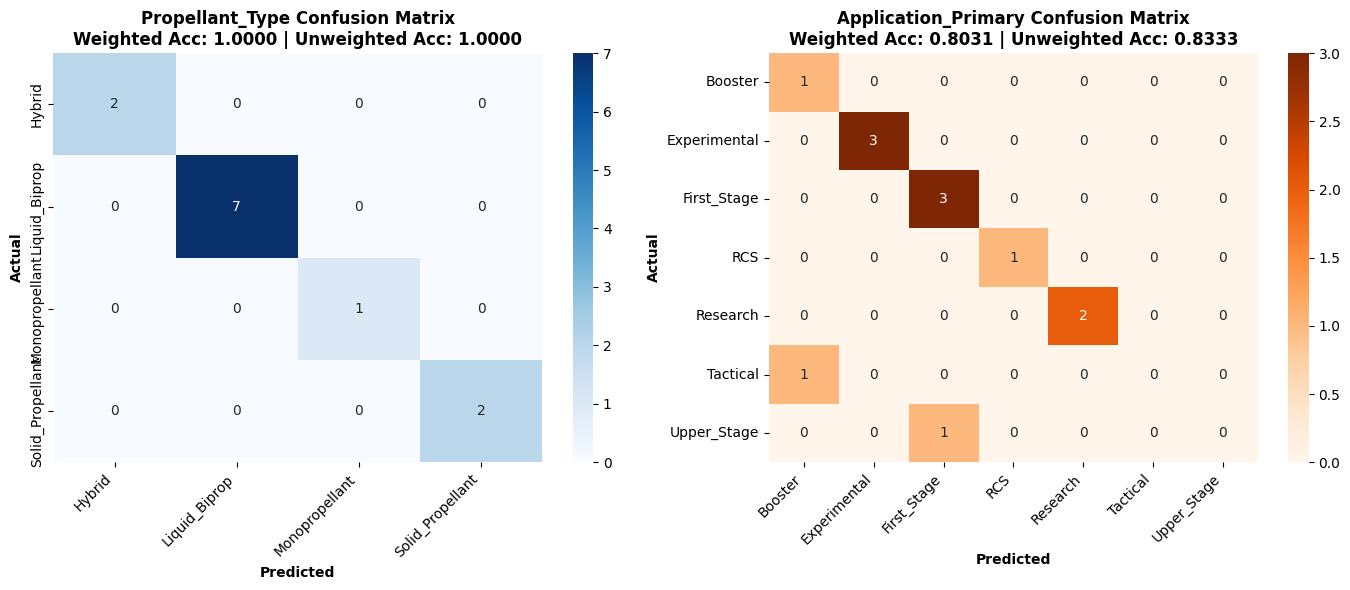

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Propellant_Type - Unweighted confusion matrix (actual counts)
ax = axes[0]
cm_prop = confusion_matrix(y_prop_test, y_prop_pred_classes)
sns.heatmap(cm_prop, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=test_class_names_prop,
            yticklabels=test_class_names_prop)
ax.set_xlabel('Predicted', fontweight='bold')
ax.set_ylabel('Actual', fontweight='bold')
ax.set_title(f'Propellant_Type Confusion Matrix\n'
             f'Weighted Acc: {weighted_acc_prop:.4f} | Unweighted Acc: {unweighted_acc_prop:.4f}',
             fontsize=12, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Application_Primary - Unweighted confusion matrix (actual counts)
ax = axes[1]
cm_app = confusion_matrix(y_app_test, y_app_pred_classes)
sns.heatmap(cm_app, annot=True, fmt='d', cmap='Oranges', ax=ax,
            xticklabels=test_class_names_app,
            yticklabels=test_class_names_app)
ax.set_xlabel('Predicted', fontweight='bold')
ax.set_ylabel('Actual', fontweight='bold')
ax.set_title(f'Application_Primary Confusion Matrix\n'
             f'Weighted Acc: {weighted_acc_app:.4f} | Unweighted Acc: {unweighted_acc_app:.4f}',
             fontsize=12, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [154]:
print("="*80)
print("PER-CLASS ACCURACY ANALYSIS")
print("="*80)

print("\nPropellant_Type per-class accuracy (Single Model):")
print("-"*80)
for i, class_name in enumerate(test_class_names_prop):
    mask = y_prop_test == test_classes_prop[i]
    if mask.sum() > 0:
        class_acc = accuracy_score(y_prop_test[mask], y_prop_pred_classes[mask])
        class_count = mask.sum()
        print(f"{class_name:<20} n={class_count:>3}  accuracy={class_acc:.4f}")

print("\nApplication_Primary per-class accuracy (Single Model):")
print("-"*80)
for i, class_name in enumerate(test_class_names_app):
    mask = y_app_test == test_classes_app[i]
    if mask.sum() > 0:
        class_acc = accuracy_score(y_app_test[mask], y_app_pred_classes[mask])
        class_count = mask.sum()
        print(f"{class_name:<20} n={class_count:>3}  accuracy={class_acc:.4f}")

PER-CLASS ACCURACY ANALYSIS

Propellant_Type per-class accuracy (Single Model):
--------------------------------------------------------------------------------
Hybrid               n=  2  accuracy=1.0000
Liquid_Biprop        n=  7  accuracy=1.0000
Monopropellant       n=  1  accuracy=1.0000
Solid_Propellant     n=  2  accuracy=1.0000

Application_Primary per-class accuracy (Single Model):
--------------------------------------------------------------------------------
Booster              n=  1  accuracy=1.0000
Experimental         n=  3  accuracy=1.0000
First_Stage          n=  3  accuracy=1.0000
RCS                  n=  1  accuracy=1.0000
Research             n=  2  accuracy=1.0000
Tactical             n=  1  accuracy=0.0000
Upper_Stage          n=  1  accuracy=0.0000


---

## Conclusion

This notebook demonstrated:

1. **Class Weighting**: Computed balanced weights to handle severe class imbalance (39:1 and 16:1 ratios)
2. **Weighted Resampling**: Implemented a workaround for PLSRegression's lack of sample_weight support
3. **PLS Classification**: Successfully achieved 98% weighted accuracy for Propellant_Type prediction

**Key Takeaway**: Class weighting is essential for imbalanced classification. The Propellant_Type model demonstrates that with proper weighting, PLS can handle moderate imbalance effectively. However, extreme imbalance (Application_Primary) requires additional strategies like class grouping or data collection.

---

**Author**: Claude  
**Date**: November 27, 2025  
**Dataset**: propellants_imputed_simple_median.csv (70 samples, 37 features)